### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

In [161]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


In [162]:
print("1. I primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto):")
df[["country", "total_litres_of_pure_alcohol"]].sort_values(by= "total_litres_of_pure_alcohol", ascending=False).head(10)

1. I primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto):


,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
61,France,11.8
45,Czech Republic,11.8
141,Russian Federation,11.5
99,Luxembourg,11.4
155,Slovakia,11.4
81,Ireland,11.4


In [163]:
print(f"\nMedia del consumo di birra: {df["beer_servings"].mean()}")


Media del consumo di birra: 106.16062176165804


In [164]:
print(f"Media del consumo di vino: {df["wine_servings"].mean()}")

Media del consumo di vino: 49.45077720207254


In [165]:
print(f"Media del consumo di distillati: {df["spirit_servings"].mean()}\n")

Media del consumo di distillati: 80.99481865284974



In [166]:
df["alcohol_index"] = (df["beer_servings"]+df["wine_servings"]+df["spirit_servings"])/3
print("Dataset con la nuova colonna:")
df.head(10)

Dataset con la nuova colonna:


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
5,Antigua & Barbuda,102,128,45,4.9,91.666667
6,Argentina,193,25,221,8.3,146.333333
7,Armenia,21,179,11,3.8,70.333333
8,Australia,261,72,212,10.4,181.666667
9,Austria,279,75,191,9.7,181.666667


In [167]:
paese = df.loc[df['alcohol_index'].idxmax(), "country"]
print(f"Il paese con il valore massimo di alcohol_index è l'{paese} ")

Il paese con il valore massimo di alcohol_index è l'Andorra 


In [168]:
bir = df.loc[df["beer_servings"]>100, ["country"]]
print("\nI paesi che consumano più di 100 birre all'anno:")
bir


I paesi che consumano più di 100 birre all'anno:


,country
3,Andorra
4,Angola
5,Antigua & Barbuda
6,Argentina
8,Australia
...,...
182,United Kingdom
184,USA
185,Uruguay
188,Venezuela


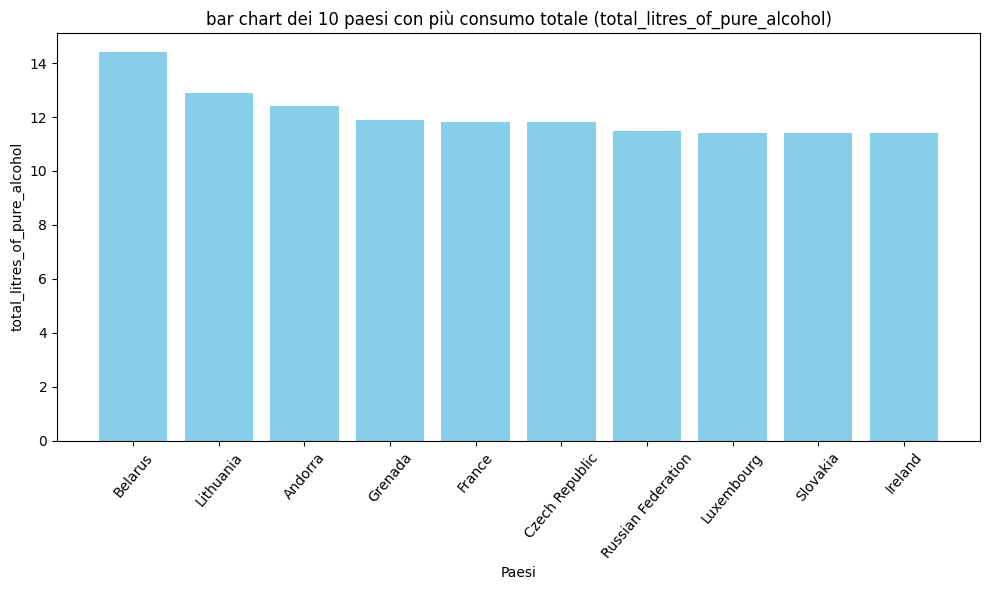

In [169]:
paesi_consum = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(paesi_consum["country"], paesi_consum["total_litres_of_pure_alcohol"], color="skyblue")
plt.title("bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)")
plt.xlabel("Paesi")
plt.ylabel("total_litres_of_pure_alcohol")
plt.xticks(rotation = 50)
plt.tight_layout()

Text(0, 0.5, 'wine_servings')

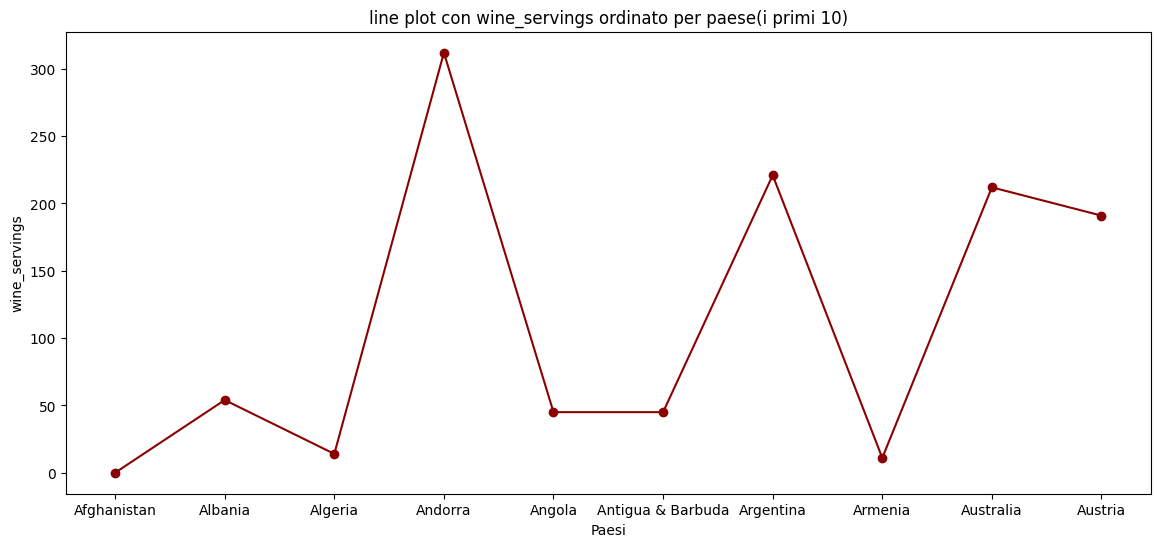

In [170]:
var = df.sort_values(by="country")
plt.figure(figsize=(14, 6))
plt.plot(var["country"].head(10), var["wine_servings"].head(10), marker="o", color="darkred")
plt.title("line plot con wine_servings ordinato per paese(i primi 10)")
plt.xlabel("Paesi")
plt.ylabel("wine_servings")

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [171]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [172]:
stipendio_med = df.groupby("job_country")["salary_year_avg"].mean().dropna()
print("Stipendio medio per paese:")
stipendio_med.reset_index()

Stipendio medio per paese:


,job_country,salary_year_avg
0,Albania,79472.500000
1,Algeria,44550.000000
2,Argentina,105212.343750
3,Armenia,78757.000000
4,Australia,118987.574324
...,...,...
103,Uruguay,69333.333333
104,Uzbekistan,30750.000000
105,Vietnam,90927.236364
106,Zambia,90670.000000


In [173]:
offerte = df.groupby("job_country")["job_title"].value_counts()
print(f"\nNumero di offerte di lavoro per paese : totale = {offerte.sum()}")
offerte.sort_values( ascending=False).reset_index()


Numero di offerte di lavoro per paese : totale = 785692


,job_country,job_title,count
0,United States,Data Scientist,14569
1,United States,Data Analyst,14086
2,United States,Data Engineer,9409
3,India,Data Engineer,4991
4,United States,Senior Data Scientist,4569
...,...,...,...
297312,Afghanistan,Information & Database Analyst,1
297313,Afghanistan,"Human Resources Officer (Data Analyst), P2, Fi...",1
297314,Afghanistan,Geographical Information Systems’ Analyst,1
297315,Afghanistan,Energy Analyst,1


In [174]:
off_max = df.groupby("job_country")["salary_year_avg"].max().dropna()
off_min = df.groupby("job_country")["salary_year_avg"].min().dropna()
print("\nsalari minimi per paese:")
off_min.reset_index()


salari minimi per paese:


,job_country,salary_year_avg
0,Albania,43200.0
1,Algeria,44100.0
2,Argentina,45000.0
3,Armenia,45000.0
4,Australia,20000.0
...,...,...
103,Uruguay,50000.0
104,Uzbekistan,30750.0
105,Vietnam,28000.0
106,Zambia,90670.0


In [175]:
print("\nsalari massimi per paese")
off_max.reset_index()


salari massimi per paese


,job_country,salary_year_avg
0,Albania,157500.0
1,Algeria,45000.0
2,Argentina,222000.0
3,Armenia,128682.0
4,Australia,257500.0
...,...,...
103,Uruguay,100500.0
104,Uzbekistan,30750.0
105,Vietnam,200000.0
106,Zambia,90670.0


In [176]:
df_set = df.groupby("job_title")["salary_year_avg"].mean().reset_index()
df_set.sort_values(by="salary_year_avg", ascending=False).dropna().head(10)

,job_title,salary_year_avg
121472,Geographic Information Systems Analyst - GIS A...,585000.0
215842,Staff Data Scientist/Quant Researcher,550000.0
126510,Hybrid - Data Engineer - Up to $600k,525000.0
215614,Staff Data Scientist - Business Analytics,525000.0
225955,VP Data Science & Research,463500.0
86629,Data Scientist (L5) - Member Product,450000.0
63446,Data Engineer (L4) - Games,450000.0
13393,Applied Data Science or Machine Learning Leader,425000.0
189489,"Senior Data Engineer, Security Master",425000.0
176405,"SVP, Data Analytics",425000.0


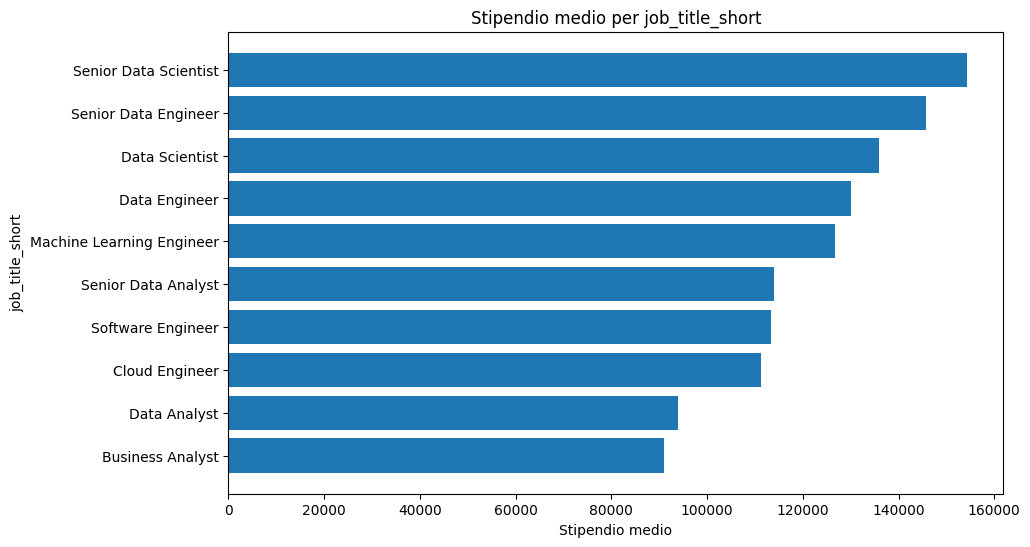

In [177]:
import matplotlib.pyplot as plt

stip_med = df.groupby("job_title_short")["salary_year_avg"].mean().reset_index()
stip_med_sort = stip_med.sort_values(by= "salary_year_avg", ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(stip_med_sort["job_title_short"], stip_med_sort["salary_year_avg"])
plt.title(f"Stipendio medio per job_title_short")
plt.xlabel("Stipendio medio")
plt.ylabel("job_title_short")
plt.show()

